In [3]:
import pandas as pd

# make essential feature list

In [2]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("dataset_phishing.csv")

# Define the columns you want to keep
selected_features = ["url",
    "length_url", "length_hostname", "ip", "nb_dots", "nb_hyphens", "nb_at",
    "nb_qm", "nb_and", "nb_or", "nb_eq", "nb_underscore", "nb_tilde",
    "nb_percent", "nb_slash", "nb_star", "nb_colon", "nb_comma",
    "nb_semicolumn", "nb_dollar", "nb_space", "nb_www", "nb_com", "nb_dslash",
    "http_in_path", "https_token", "ratio_digits_url", "ratio_digits_host",
    "punycode", "port", "tld_in_path", "tld_in_subdomain", "abnormal_subdomain",
    "nb_subdomains", "prefix_suffix", "random_domain", "shortening_service",
    "path_extension", "nb_redirection", "nb_external_redirection",
    "length_words_raw", "char_repeat", "shortest_words_raw", "shortest_word_host",
    "shortest_word_path", "longest_words_raw", "longest_word_host",
    "longest_word_path", "avg_words_raw", "avg_word_host", "avg_word_path",
    "phish_hints", "domain_in_brand", "brand_in_subdomain", "brand_in_path",
    "suspecious_tld", "statistical_report",
    "status"
]

# Keep only those columns
filtered_df = df[selected_features]

# Save the filtered data to a new CSV
filtered_df.to_csv("filtered_features.csv", index=False)


In [4]:
filtered_df = pd.read_csv("filtered_features.csv")
filtered_df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,5.750000,7.00,4.500000,0,0,0,0,0,0,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,15.750000,19.00,14.666667,0,0,0,0,0,0,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,8.250000,8.40,8.142857,0,0,0,0,0,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,5.000000,5.00,0.000000,0,0,0,0,0,0,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,6.333333,5.00,7.000000,0,0,0,0,0,0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,7.750000,6.00,9.500000,0,0,0,0,0,0,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,5.166667,6.50,4.900000,0,0,0,0,0,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,6.153846,5.50,6.272727,0,1,0,0,0,0,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,12.500000,12.50,0.000000,0,0,0,0,0,0,legitimate


# Data Preprocessing

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the filtered dataset
df = pd.read_csv("filtered_features.csv")

# --- Step 1: Check for missing / NaN values ---
print("🔍 Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))
print("\nTotal missing values:", df.isnull().sum().sum())

# --- Step 2: Separate features and target variable ---
# (Assuming target column is named 'status')
X = df.drop(columns=['status'])
y = df['status']

# # --- Step 3: Handle missing values ---
# # Fill numeric columns with median, categorical with mode
# numeric_cols = X.select_dtypes(include=['number']).columns
# categorical_cols = X.select_dtypes(exclude=['number']).columns

# # Fill NaN for numeric columns with median
# X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# # Fill NaN for categorical columns with mode
# for col in categorical_cols:
#     X[col] = X[col].fillna(X[col].mode()[0])

# print("\n Missing values handled successfully!")

# # --- Step 4: One-Hot Encoding for categorical features ---
# if len(categorical_cols) > 0:
#     print(f"\n Categorical columns to encode: {list(categorical_cols)}")
#     encoder = OneHotEncoder(drop='first', sparse_output=False)
#     encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
#     encoded.columns = encoder.get_feature_names_out(categorical_cols)
#     X = pd.concat([X.drop(columns=categorical_cols), encoded], axis=1)
# else:
#     print("\n No categorical columns found — skipping OneHotEncoding.")

# # --- Step 5: Final preprocessed data overview ---
# print(f"\n Preprocessing complete! Final shape: {X.shape}")
# print("Sample of processed data:")
# display(X.head())


🔍 Missing values per column:
url                        0
length_url                 0
length_hostname            0
ip                         0
nb_dots                    0
nb_hyphens                 0
nb_at                      0
nb_qm                      0
nb_and                     0
nb_or                      0
nb_eq                      0
nb_underscore              0
nb_tilde                   0
nb_percent                 0
nb_slash                   0
nb_star                    0
nb_colon                   0
nb_comma                   0
nb_semicolumn              0
nb_dollar                  0
nb_space                   0
nb_www                     0
nb_com                     0
nb_dslash                  0
http_in_path               0
https_token                0
ratio_digits_url           0
ratio_digits_host          0
punycode                   0
port                       0
tld_in_path                0
tld_in_subdomain           0
abnormal_subdomain         0
nb_subdomains 

# Study the Spread (Descriptive Stats + Visuals)

📈 Found 56 numeric columns out of 57 total features.

📊 Descriptive Statistics for Numeric Features:



,mean,median,std,min,max
length_url,61.126684,47.000000,55.297318,12.0,1641.000000
length_hostname,21.090289,19.000000,10.777171,4.0,214.000000
ip,0.150569,0.000000,0.357644,0.0,1.000000
nb_dots,2.480752,2.000000,1.369686,1.0,24.000000
nb_hyphens,0.997550,0.000000,2.087087,0.0,43.000000
nb_at,0.022222,0.000000,0.155500,0.0,4.000000
nb_qm,0.141207,0.000000,0.364456,0.0,3.000000
nb_and,0.162292,0.000000,0.821337,0.0,19.000000
nb_or,0.000000,0.000000,0.000000,0.0,0.000000
nb_eq,0.293176,0.000000,0.998317,0.0,19.000000


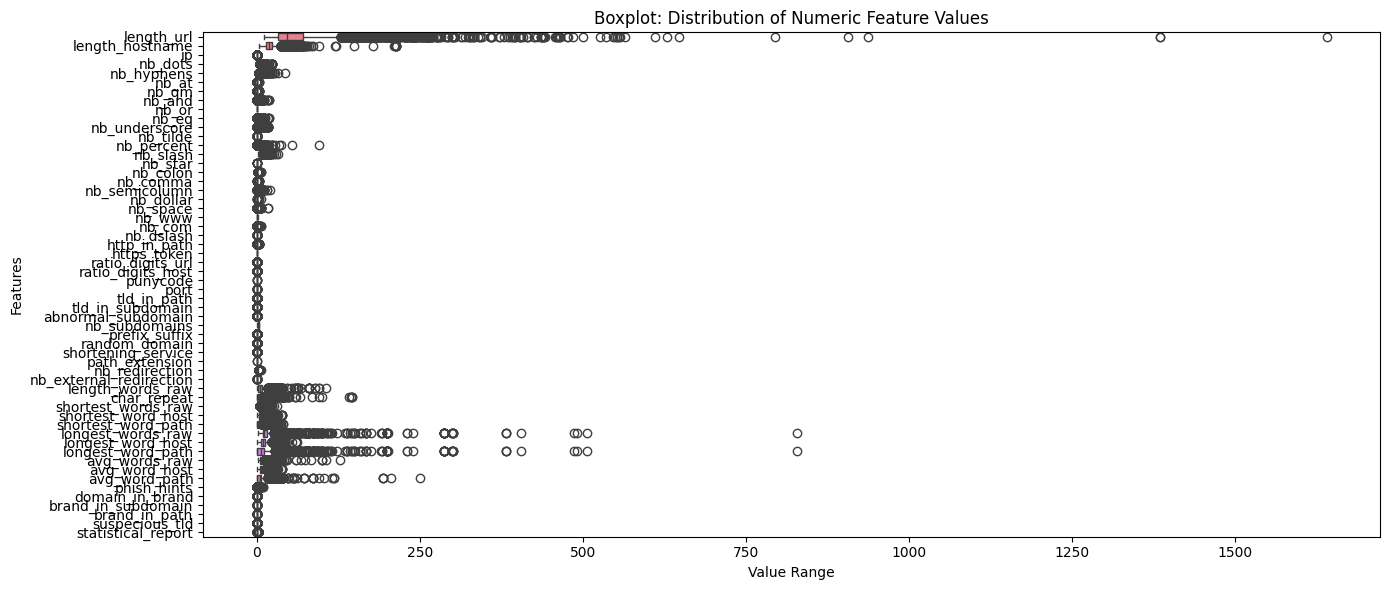

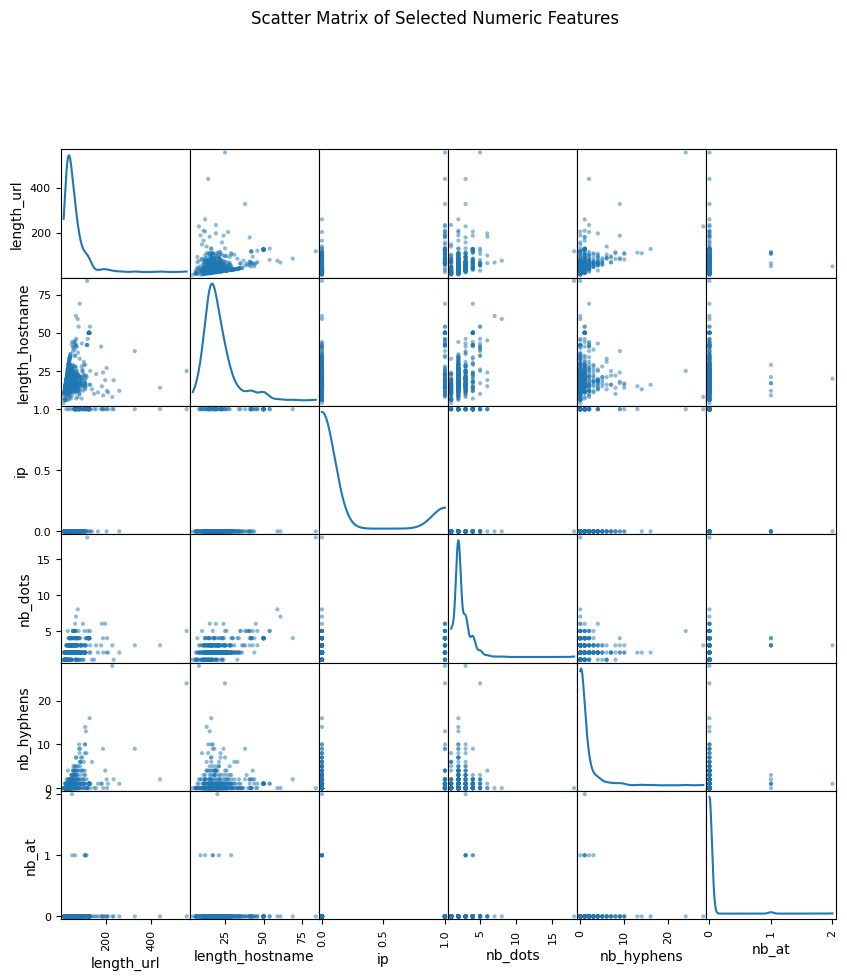

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 1: Select only numeric columns for analysis ---
X_numeric = X.select_dtypes(include=['number'])

print(f"📈 Found {X_numeric.shape[1]} numeric columns out of {X.shape[1]} total features.")

# --- Step 2: Descriptive Statistics (Mean, Median, Std, etc.) ---
print("\n📊 Descriptive Statistics for Numeric Features:\n")

stats = X_numeric.describe().T  # Transpose for better readability
stats['median'] = X_numeric.median()
stats = stats[['mean', 'median', 'std', 'min', 'max']]
display(stats)

# --- Step 3: Visualize the Spread using Boxplots ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=X_numeric, orient='h', linewidth=1)
plt.title("Boxplot: Distribution of Numeric Feature Values")
plt.xlabel("Value Range")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# --- Step 4: Scatter Matrix (Optional, can be slow for large datasets) ---
if X_numeric.shape[1] > 6:
    sample_cols = X_numeric.columns[:6]  # first 6 numeric features
else:
    sample_cols = X_numeric.columns

pd.plotting.scatter_matrix(X_numeric[sample_cols].sample(min(500, len(X_numeric))), 
                           figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatter Matrix of Selected Numeric Features", y=1.02)
plt.show()


# Correlation Analysis (Features & Target)

In [6]:
# | Step  | Purpose                                                         |
# | ----- | --------------------------------------------------------------- |
# | **1** | Correlation matrix among numeric features (heatmap)             |
# | **2** | Compute correlation between each feature and target (`status`)  |
# | **3** | Display top positively & negatively correlated features         |
# | **4** | Bar plot showing the absolute correlation magnitude             |
# | **5** | Heatmap focusing on top 20 most relevant features to the target |


🎯 Target encoding used for correlation: {'legitimate': 0, 'phishing': 1}


C:\Users\khyal\AppData\Local\Temp\ipykernel_4112\90028599.py:21: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


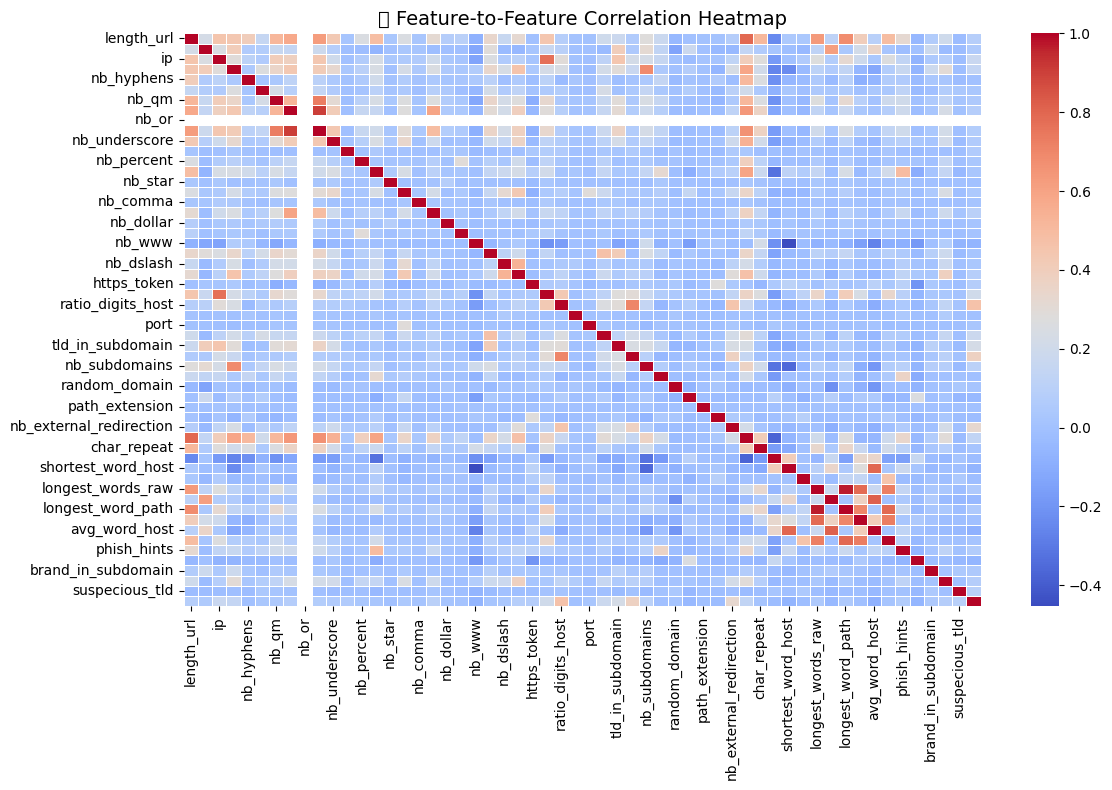


📈 Top 15 positively correlated with target:


ratio_digits_url      0.356395
phish_hints           0.335393
ip                    0.321698
nb_qm                 0.294319
length_url            0.248580
nb_slash              0.242270
length_hostname       0.238322
nb_eq                 0.233386
ratio_digits_host     0.224335
shortest_word_host    0.223084
prefix_suffix         0.214681
longest_word_path     0.212709
tld_in_subdomain      0.208884
nb_dots               0.207029
longest_words_raw     0.200147
Name: __target__, dtype: float64


📉 Top 15 negatively correlated with target:


nb_star               2.646512e-02
nb_dollar             2.496206e-02
random_domain         1.963062e-02
punycode              1.871039e-02
char_repeat           1.473217e-02
nb_comma              1.186465e-02
port                  9.011116e-03
path_extension        5.592660e-17
nb_or                 0.000000e+00
nb_space             -4.193222e-03
nb_redirection       -2.440520e-02
shortest_words_raw   -3.936361e-02
domain_in_brand      -9.822216e-02
nb_hyphens           -1.001075e-01
nb_www               -4.434677e-01
Name: __target__, dtype: float64


⚠️ Columns with constant values (ignored in correlation): ['nb_or']


C:\Users\khyal\AppData\Local\Temp\ipykernel_4112\90028599.py:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


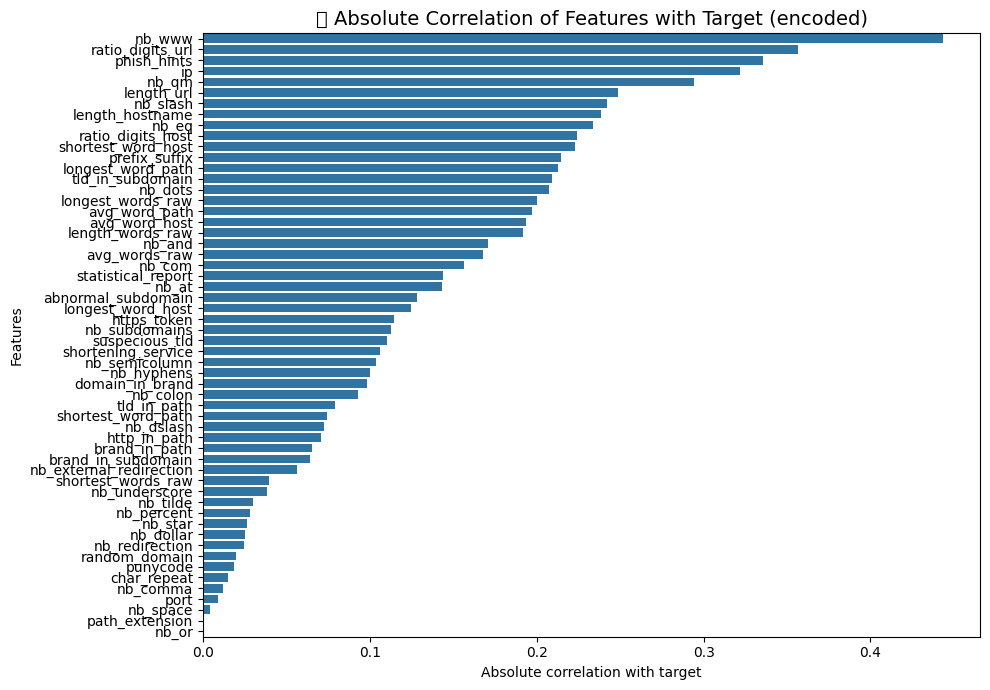

C:\Users\khyal\AppData\Local\Temp\ipykernel_4112\90028599.py:67: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


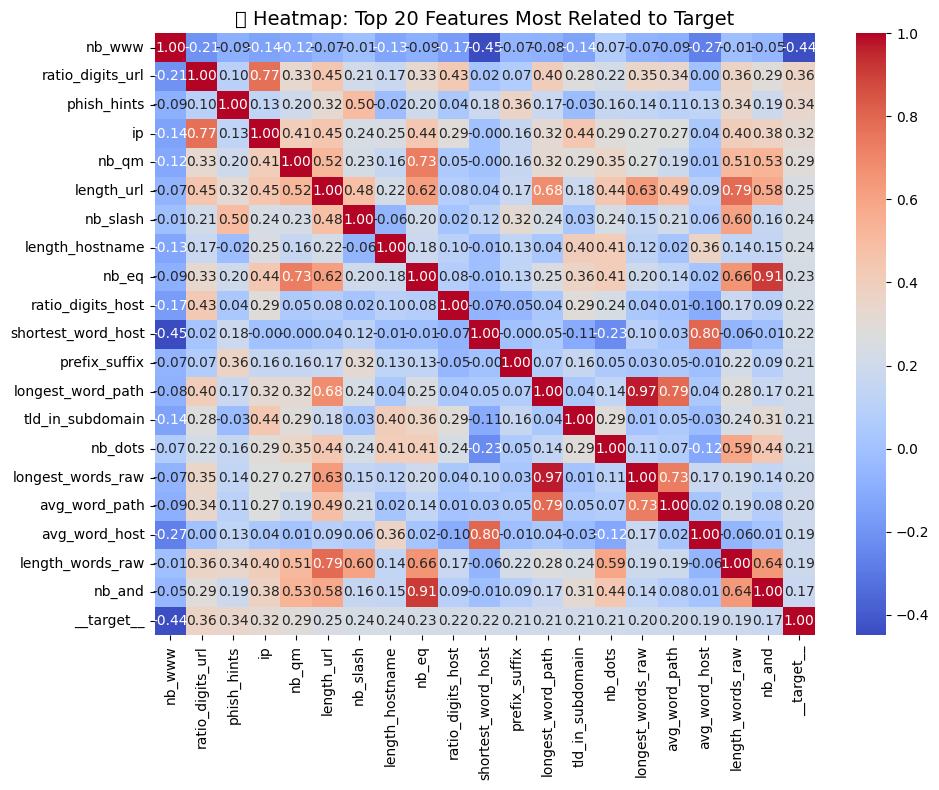

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 0: Make sure we use numeric features only ---
X_numeric = X.select_dtypes(include=['number']).copy()

# --- Step 1: Encode target to numeric for correlation only ---
# factorize returns numeric codes and the class labels
y_num, y_classes = pd.factorize(y)
target_mapping = {cls: code for code, cls in enumerate(y_classes)}
print("🎯 Target encoding used for correlation:", target_mapping)

# --- Step 2: Feature-to-Feature Correlation Heatmap ---
corr_matrix = X_numeric.corr(numeric_only=True).clip(-1, 1)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Feature-to-Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

# --- Step 3: Correlation of each feature with the target ---
df_corr = pd.concat([X_numeric, pd.Series(y_num, name='__target__', index=X_numeric.index)], axis=1)

corr_with_target = (
    df_corr.corr(numeric_only=True)['__target__']
    .drop('__target__')
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0.0)
    .sort_values(ascending=False)
)

print("\n📈 Top 15 positively correlated with target:")
display(corr_with_target.head(15))

print("\n📉 Top 15 negatively correlated with target:")
display(corr_with_target.tail(15))

# Flag constant-variance columns (they have NaN corr originally)
const_cols = X_numeric.columns[X_numeric.nunique() <= 1].tolist()
if const_cols:
    print(f"\n⚠️ Columns with constant values (ignored in correlation): {const_cols}")

# --- Step 4: Bar plot of absolute correlation with target ---
corr_abs = corr_with_target.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=corr_abs.values, y=corr_abs.index)
plt.title("📊 Absolute Correlation of Features with Target (encoded)", fontsize=14)
plt.xlabel("Absolute correlation with target")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# --- Step 5: Heatmap of top-N target-related features ---
top_n = 20 if len(corr_abs) >= 20 else len(corr_abs)
top_features = corr_abs.head(top_n).index.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(
    df_corr[top_features + ['__target__']].corr(numeric_only=True).round(2),
    annot=True, cmap='coolwarm', fmt=".2f", cbar=True
)
plt.title(f"🔥 Heatmap: Top {top_n} Features Most Related to Target", fontsize=14)
plt.tight_layout()
plt.show()


# Feature Selection, Highest correlation, remove multicollinear features

In [8]:
import numpy as np
import pandas as pd

# -------------------------------
# Configurable parameters
# -------------------------------
TOP_K = 60          # Keep top K most correlated features
CORR_THRESHOLD = 0.92   # Drop one of two features if |corr| > this value
VIF_THRESHOLD = 10      # Optional, for linear models only
# -------------------------------

# We'll only work with numeric columns for correlation analysis
X_num = X.select_dtypes(include=['number']).copy()

# Encode target to numeric if it's categorical (e.g., 'phishing', 'legitimate')
y_encoded, y_labels = pd.factorize(y)
print("Target encoding for correlation:", dict(zip(y_labels, range(len(y_labels)))))

# Step 1: Rank features by absolute correlation with target
corr_with_target = X_num.apply(lambda col: np.corrcoef(col, y_encoded)[0, 1])
corr_with_target = corr_with_target.fillna(0)
corr_ranked = corr_with_target.abs().sort_values(ascending=False)

top_features = corr_ranked.head(TOP_K).index.tolist()
print(f"\nKeeping top {len(top_features)} features based on correlation with target:")
display(corr_ranked.head(15))

X_top = X_num[top_features].copy()

# Step 2: Remove highly correlated (redundant) features
def remove_high_corr_features(X_df, corr_limit=0.92):
    corr_matrix = X_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > corr_limit)]
    print(f"\nDropping {len(to_drop)} highly correlated features (|corr| > {corr_limit}):")
    if to_drop:
        print(to_drop)
    return X_df.drop(columns=to_drop, errors='ignore')

X_reduced = remove_high_corr_features(X_top, corr_limit=CORR_THRESHOLD)

# Step 3 (Optional): Check Variance Inflation Factor (VIF)
# This helps remove multi-way collinearity, useful mainly for linear models.
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_reduced.columns
    vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
    high_vif = vif_data[vif_data["VIF"] > VIF_THRESHOLD]

    if not high_vif.empty:
        print(f"\nRemoving {len(high_vif)} features with VIF > {VIF_THRESHOLD}:")
        print(high_vif)
        X_final = X_reduced.drop(columns=high_vif["feature"])
    else:
        print("\nNo high-VIF features found.")
        X_final = X_reduced.copy()

except ImportError:
    print("\nSkipping VIF check — install statsmodels to enable it.")
    X_final = X_reduced.copy()

# Final result
print(f"\nFinal selected feature count: {X_final.shape[1]}")
X_selected = X_final.copy()


Target encoding for correlation: {'legitimate': 0, 'phishing': 1}

Keeping top 56 features based on correlation with target:


c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nb_www                0.443468
ratio_digits_url      0.356395
phish_hints           0.335393
ip                    0.321698
nb_qm                 0.294319
length_url            0.248580
nb_slash              0.242270
length_hostname       0.238322
nb_eq                 0.233386
ratio_digits_host     0.224335
shortest_word_host    0.223084
prefix_suffix         0.214681
longest_word_path     0.212709
tld_in_subdomain      0.208884
nb_dots               0.207029
dtype: float64


Dropping 1 highly correlated features (|corr| > 0.92):
['longest_words_raw']

Removing 15 features with VIF > 10:
               feature         VIF
5           length_url   24.909985
6             nb_slash   39.713981
7      length_hostname   18.279423
8                nb_eq   14.135579
10  shortest_word_host   49.478068
14             nb_dots   32.218273
15       avg_word_path   18.316899
16       avg_word_host  265.306016
17    length_words_raw  127.673045
18              nb_and   11.812208
19       avg_words_raw   66.695958
24   longest_word_host  107.609286
26       nb_subdomains   28.418622
32            nb_colon   21.833715
40  shortest_words_raw   11.061097

Final selected feature count: 40


c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [9]:
X_selected

,nb_www,ratio_digits_url,phish_hints,ip,nb_qm,ratio_digits_host,prefix_suffix,longest_word_path,tld_in_subdomain,nb_com,...,nb_dollar,nb_redirection,random_domain,punycode,char_repeat,nb_comma,port,nb_space,path_extension,nb_or
0,1,0.000000,0,0,0,0.000000,0,6,0,0,...,0,0,0,0,4,0,0,0,0,0
1,0,0.220779,0,1,0,0.000000,0,32,0,0,...,0,1,0,0,4,0,0,0,0,0
2,0,0.150794,0,1,1,0.000000,1,17,1,1,...,0,1,0,0,2,0,0,0,0,0
3,0,0.000000,0,0,0,0.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0.000000,0,0,0,0.000000,0,11,0,0,...,0,1,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1,0.000000,0,0,0,0.000000,0,11,0,0,...,0,1,0,0,4,0,0,0,0,0
11426,1,0.023810,0,0,1,0.000000,0,8,0,1,...,0,1,0,0,3,0,0,1,0,0
11427,1,0.142857,0,1,1,0.000000,0,15,0,0,...,0,0,0,0,5,0,0,0,0,0
11428,1,0.000000,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


# Feature Normalisation

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_selected),
    columns=X_selected.columns,
    index=X_selected.index
)

print("✅ Feature normalization complete.")
print(f"Shapes -> X_selected: {X_selected.shape}, X_scaled: {X_scaled.shape}")

# Pick a column that exists (the first one) for a quick check
sample_col = X_selected.columns[0]

print(f"\nSample column check → '{sample_col}':")
print(f"  Original mean: {X_selected[sample_col].mean():.3f}")
print(f"  Scaled mean:   {X_scaled[sample_col].mean():.3f}")
print(f"  Scaled std:    {X_scaled[sample_col].std(ddof=1):.3f}")

print("\nUse:")
print(" - X_scaled for Logistic Regression, SVM, KNN, Neural Networks")
print(" - X_selected (unscaled) for Tree-based models (RandomForest, XGBoost)")


✅ Feature normalization complete.
Shapes -> X_selected: (11430, 40), X_scaled: (11430, 40)

Sample column check → 'nb_www':
  Original mean: 0.448
  Scaled mean:   -0.000
  Scaled std:    1.000

Use:
 - X_scaled for Logistic Regression, SVM, KNN, Neural Networks
 - X_selected (unscaled) for Tree-based models (RandomForest, XGBoost)


In [11]:
X_scaled

,nb_www,ratio_digits_url,phish_hints,ip,nb_qm,ratio_digits_host,prefix_suffix,longest_word_path,tld_in_subdomain,nb_com,...,nb_dollar,nb_redirection,random_domain,punycode,char_repeat,nb_comma,port,nb_space,path_extension,nb_or
0,1.098907,-0.594651,-0.388973,-0.421020,-0.387464,-0.267868,-0.503825,-0.197666,-0.229732,-0.337729,...,-0.024962,-0.720143,-0.301425,-0.01871,0.224909,-0.038984,-0.04866,-0.092717,-0.013229,0.0
1,-0.893559,1.876053,-0.388973,2.375182,-0.387464,-0.267868,-0.503825,0.929003,-0.229732,-0.337729,...,-0.024962,0.725201,-0.301425,-0.01871,0.224909,-0.038984,-0.04866,-0.092717,-0.013229,0.0
2,-0.893559,1.092856,-0.388973,2.375182,2.356473,-0.267868,1.984817,0.279002,4.352889,2.300854,...,-0.024962,0.725201,-0.301425,-0.01871,-0.194490,-0.038984,-0.04866,-0.092717,-0.013229,0.0
3,-0.893559,-0.594651,-0.388973,-0.421020,-0.387464,-0.267868,-0.503825,-0.457666,-0.229732,-0.337729,...,-0.024962,0.725201,-0.301425,-0.01871,-0.613890,-0.038984,-0.04866,-0.092717,-0.013229,0.0
4,1.098907,-0.594651,-0.388973,-0.421020,-0.387464,-0.267868,-0.503825,0.019001,-0.229732,-0.337729,...,-0.024962,0.725201,-0.301425,-0.01871,0.015209,-0.038984,-0.04866,-0.092717,-0.013229,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1.098907,-0.594651,-0.388973,-0.421020,-0.387464,-0.267868,-0.503825,0.019001,-0.229732,-0.337729,...,-0.024962,0.725201,-0.301425,-0.01871,0.224909,-0.038984,-0.04866,-0.092717,-0.013229,0.0
11426,1.098907,-0.328202,-0.388973,-0.421020,2.356473,-0.267868,-0.503825,-0.110999,-0.229732,2.300854,...,-0.024962,0.725201,-0.301425,-0.01871,0.015209,-0.038984,-0.04866,2.569979,-0.013229,0.0
11427,1.098907,1.004040,-0.388973,2.375182,2.356473,-0.267868,-0.503825,0.192335,-0.229732,-0.337729,...,-0.024962,-0.720143,-0.301425,-0.01871,0.434608,-0.038984,-0.04866,-0.092717,-0.013229,0.0
11428,1.098907,-0.594651,-0.388973,-0.421020,-0.387464,-0.267868,-0.503825,-0.457666,-0.229732,-0.337729,...,-0.024962,-0.720143,-0.301425,-0.01871,0.015209,-0.038984,-0.04866,-0.092717,-0.013229,0.0


In [12]:
X_selected

,nb_www,ratio_digits_url,phish_hints,ip,nb_qm,ratio_digits_host,prefix_suffix,longest_word_path,tld_in_subdomain,nb_com,...,nb_dollar,nb_redirection,random_domain,punycode,char_repeat,nb_comma,port,nb_space,path_extension,nb_or
0,1,0.000000,0,0,0,0.000000,0,6,0,0,...,0,0,0,0,4,0,0,0,0,0
1,0,0.220779,0,1,0,0.000000,0,32,0,0,...,0,1,0,0,4,0,0,0,0,0
2,0,0.150794,0,1,1,0.000000,1,17,1,1,...,0,1,0,0,2,0,0,0,0,0
3,0,0.000000,0,0,0,0.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0.000000,0,0,0,0.000000,0,11,0,0,...,0,1,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1,0.000000,0,0,0,0.000000,0,11,0,0,...,0,1,0,0,4,0,0,0,0,0
11426,1,0.023810,0,0,1,0.000000,0,8,0,1,...,0,1,0,0,3,0,0,1,0,0
11427,1,0.142857,0,1,1,0.000000,0,15,0,0,...,0,0,0,0,5,0,0,0,0,0
11428,1,0.000000,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


# Train test split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,  # your feature set (excluding url & status)
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --- Feature Scaling ---
scaler = StandardScaler().fit(X_train)
X_train_s = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_s  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns)

print("✅ Train/Test split complete.")
print(f"Training: {X_train.shape}, Testing: {X_test.shape}")
print(f"Class balance train: {y_train.value_counts(normalize=True).round(3).to_dict()}")
print(f"Class balance test:  {y_test.value_counts(normalize=True).round(3).to_dict()}")


✅ Train/Test split complete.
Training: (9144, 40), Testing: (2286, 40)
Class balance train: {'legitimate': 0.5, 'phishing': 0.5}
Class balance test:  {'phishing': 0.5, 'legitimate': 0.5}


In [27]:
X_train

,nb_www,ratio_digits_url,phish_hints,ip,nb_qm,ratio_digits_host,prefix_suffix,longest_word_path,tld_in_subdomain,nb_com,...,nb_dollar,nb_redirection,random_domain,punycode,char_repeat,nb_comma,port,nb_space,path_extension,nb_or
7609,1,0.109375,0,1,0,0.000000,0,12,0,0,...,0,1,0,0,4,0,0,0,0,0
6408,0,0.187500,0,1,1,0.000000,1,17,1,1,...,0,1,0,0,4,0,0,0,0,0
7464,1,0.000000,2,0,0,0.000000,0,13,0,1,...,0,0,0,0,5,0,0,0,0,0
9286,0,0.111111,0,0,1,0.000000,0,26,0,0,...,0,1,0,0,2,0,0,0,0,0
5159,0,0.159091,0,1,0,0.000000,0,7,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,0.100000,0,0,0,0.000000,0,9,0,0,...,0,0,0,0,1,0,0,0,0,0
9876,1,0.027778,0,0,0,0.000000,0,6,0,0,...,0,0,0,0,4,0,0,0,0,0
4943,0,0.000000,0,0,0,0.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9054,1,0.038462,1,0,0,0.000000,1,13,0,0,...,0,1,0,0,3,0,0,0,0,0


# Model training 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models (with scaling logic)
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), True),
    "KNN": (KNeighborsClassifier(n_neighbors=7), True),
    "SVM (Linear)": (SVC(kernel="linear", probability=True), True),
    "Kernel SVM": (SVC(kernel="rbf", probability=True), True),
    "Naive Bayes": (GaussianNB(), True),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), False),
    "Random Forest": (RandomForestClassifier(n_estimators=300, random_state=42), False),
}

trained_models = {}

for name, (model, scaled) in models.items():
    Xtr = X_train_s if scaled else X_train
    model.fit(Xtr, y_train)
    trained_models[name] = (model, scaled)
    print(f"✅ Trained {name}")


✅ Trained Logistic Regression
✅ Trained KNN
✅ Trained SVM (Linear)
✅ Trained Kernel SVM
✅ Trained Naive Bayes
✅ Trained Decision Tree
✅ Trained Random Forest


# Model Testing & Evaluation

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
6,Random Forest,0.894138,0.895522,0.892388,0.893953,0.958030
1,KNN,0.868329,0.862931,0.875766,0.869301,0.937061
3,Kernel SVM,0.862205,0.833333,0.905512,0.867925,0.939675
5,Decision Tree,0.867017,0.867017,0.867017,0.867017,0.873464
0,Logistic Regression,0.839020,0.845674,0.829396,0.837456,0.921825
2,SVM (Linear),0.828521,0.806531,0.864392,0.834459,0.920187
4,Naive Bayes,0.653981,0.923077,0.335958,0.492623,0.859533


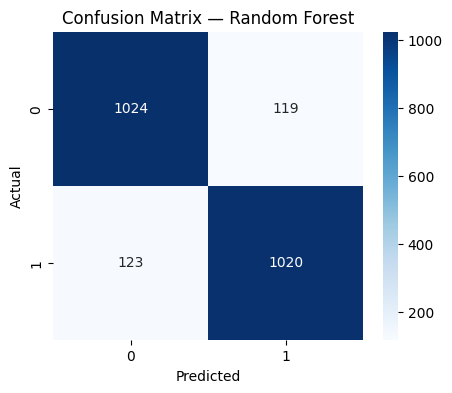

In [15]:
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

results = []

for name, (model, scaled) in trained_models.items():
    Xte = X_test_s if scaled else X_test
    y_pred = model.predict(Xte)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label="phishing", zero_division=0)
    
    try:
        y_proba = model.predict_proba(Xte)[:, 1]
        y_true_bin = (y_test == "phishing").astype(int)
        rocauc = roc_auc_score(y_true_bin, y_proba)
    except:
        rocauc = np.nan

    results.append([name, acc, prec, rec, f1, rocauc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
results_df = results_df.sort_values(by="F1", ascending=False)
display(results_df)

# Best model
best_model_name = results_df.iloc[0]["Model"]
best_model, best_scaled = trained_models[best_model_name]
Xte_best = X_test_s if best_scaled else X_test
y_pred_best = best_model.predict(Xte_best)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model Inferences

In [16]:
print(f"🏆 Best model: {best_model_name}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

print("\n✅ Inference:")
print(f"- {best_model_name} performed best based on F1 and ROC-AUC.")
print("- It balances precision and recall well, meaning it detects phishing effectively without too many false alarms.")
print("- You can now save this model for deployment or compare it with advanced ones (XGBoost, LightGBM, etc.).")


🏆 Best model: Random Forest

📋 Classification Report:
              precision    recall  f1-score   support

  legitimate       0.89      0.90      0.89      1143
    phishing       0.90      0.89      0.89      1143

    accuracy                           0.89      2286
   macro avg       0.89      0.89      0.89      2286
weighted avg       0.89      0.89      0.89      2286


✅ Inference:
- Random Forest performed best based on F1 and ROC-AUC.
- It balances precision and recall well, meaning it detects phishing effectively without too many false alarms.
- You can now save this model for deployment or compare it with advanced ones (XGBoost, LightGBM, etc.).


# New URLs (end-to-end)

In [17]:
import joblib

# 1) the exact column order after your reduction step
selected_cols = list(X_selected.columns)

# 2) your best model & whether it expects scaling
best_model_name = results_df.iloc[0]["Model"]
best_model, best_scaled = trained_models[best_model_name]

# 3) persist what you need for inference
joblib.dump({
    "selected_cols": selected_cols,
    "scaler": scaler,              # fitted on X_train
    "best_model": best_model,
    "best_scaled": best_scaled,
    "best_model_name": best_model_name,
}, "phish_artifacts.pkl")
print("✅ Saved inference artifacts.")


✅ Saved inference artifacts.


In [ ]:
import numpy as np
import pandas as pd
import joblib

def predict_url_features(feature_dict_or_series, artifacts_path="phish_artifacts.pkl"):
    # Load artifacts
    bundle = joblib.load(artifacts_path)
    selected_cols = bundle["selected_cols"]
    scaler       = bundle["scaler"]
    best_model   = bundle["best_model"]
    best_scaled  = bundle["best_scaled"]
    name         = bundle["best_model_name"]
 
    # Build one-row DataFrame from the extracted features (56 keys)
    X_new = pd.DataFrame([dict(feature_dict_or_series)])

    # Align to training-time selection & order:
    # - keep only the selected columns
    # - add any missing ones as 0 (or another default if you prefer)
    X_new = X_new.reindex(columns=selected_cols, fill_value=0)

    # Apply the same scaler if the model expects scaled inputs
    if best_scaled:
        X_new_arr = scaler.transform(X_new)
    else:
        X_new_arr = X_new.values

    # Predict label
    y_pred = best_model.predict(X_new_arr)[0]

    # Probability if supported
    try:
        y_proba = best_model.predict_proba(X_new_arr)[:, 1][0]
    except Exception:
        y_proba = (best_model.decision_function(X_new_arr)[0]
                   if hasattr(best_model, "decision_function") else np.nan)

    return {
        "model": name,
        "label": y_pred,
        "phishing_probability": float(y_proba) if np.isscalar(y_proba) else np.nan
    }


In [20]:
new_features = {
    'length_url': 126, 'length_hostname': 50, 'ip': 1, 'nb_dots': 4, 'nb_hyphens': 1, 'nb_at': 0,
    'nb_qm': 1, 'nb_and': 2, 'nb_or': 0, 'nb_eq': 3, 'nb_underscore': 2, 'nb_tilde': 0, 'nb_percent': 0,
    'nb_slash': 5, 'nb_star': 0, 'nb_colon': 1, 'nb_comma': 0, 'nb_semicolumn': 0, 'nb_dollar': 0,
    'nb_space': 0, 'nb_www': 0, 'nb_com': 2, 'nb_dslash': 0, 'http_in_path': 0, 'https_token': 1,
    'ratio_digits_url': 0.15079365079365079, 'ratio_digits_host': 0.0, 'punycode': 0, 'port': 0,
    'tld_in_path': 0, 'tld_in_subdomain': 1, 'abnormal_subdomain': 1, 'nb_subdomains': 3, 'prefix_suffix': 0,
    'random_domain': 0, 'shortening_service': 0, 'path_extension': 0, 'nb_redirection': 0,
    'nb_external_redirection': 0, 'length_words_raw': 107, 'char_repeat': 2, 'shortest_words_raw': 2,
    'shortest_word_host': 50, 'shortest_word_path': 20, 'longest_words_raw': 17, 'longest_word_host': 50,
    'longest_word_path': 20, 'avg_words_raw': 7.642857142857143, 'avg_word_host': 50.0, 'avg_word_path': 20.0,
    'phish_hints': 1, 'domain_in_brand': 0, 'brand_in_subdomain': 1, 'brand_in_path': 0,
    'suspecious_tld': 0, 'statistical_report': 0
}

result = predict_url_features(new_features)
print(result)


{'model': 'Random Forest', 'label': 'phishing', 'phishing_probability': 0.9166666666666666}


c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\khyal\Desktop\Phishing Detection System\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
result

{'model': 'Random Forest',
 'label': 'phishing',
 'phishing_probability': 0.9166666666666666}

In [22]:
selected_cols

['nb_www',
 'ratio_digits_url',
 'phish_hints',
 'ip',
 'nb_qm',
 'ratio_digits_host',
 'prefix_suffix',
 'longest_word_path',
 'tld_in_subdomain',
 'nb_com',
 'statistical_report',
 'nb_at',
 'abnormal_subdomain',
 'https_token',
 'suspecious_tld',
 'shortening_service',
 'nb_semicolumn',
 'nb_hyphens',
 'domain_in_brand',
 'tld_in_path',
 'shortest_word_path',
 'nb_dslash',
 'http_in_path',
 'brand_in_path',
 'brand_in_subdomain',
 'nb_external_redirection',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_star',
 'nb_dollar',
 'nb_redirection',
 'random_domain',
 'punycode',
 'char_repeat',
 'nb_comma',
 'port',
 'nb_space',
 'path_extension',
 'nb_or']